**Import all the required packages that we may need.**

In [154]:
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

Uploading the Bank Management Data set, The Dataset can be described as below.

Input variables:

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

So there are total 21 columns and 41188 rows(data entries) in the choosen dataset.

In [155]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep = ";")
data2=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep = ";")

data.name = "data"
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**What are the data types? (Only numeric and categorical)**

In [ ]:
#Data types of the columns present in the DataSet
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

We can see from above that out of the 21 columns present in the dataset, there are 10 Numerical datatypes and 11 Categorical ones.

Numerical/Quantitative DataTypes: Numerical data refers to the data that is in the form of numbers, and not in any language or descriptive form. ex: age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed

Categorical/Qualitative DataTypes: Categorical data refers to a data type that can be stored and identified based on the names or labels given to them. ex: job,marital,education,default,housing,loan,poutcome,contact,month,day_of_week,y

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Using Describe helps us to understand the data in much better sense, we can now see the range, means, standard deviations, max-min and percentiles of the data, which helps us make better sense of the data.

As we can see from above that the data ranges of the columns are vastly different (ie: nr.employed mean 5167.035911 and emp.var.rate mean 0.081886). So to mprove the quality of our data we need to normalize it.

**Are there missing values?**

In [ ]:
data.count()

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp.var.rate      41188
cons.price.idx    41188
cons.conf.idx     41188
euribor3m         41188
nr.employed       41188
y                 41188
dtype: int64

In [ ]:
# We need to check null values in dataset
data.isnull().sum()
#isnull(): This function takes a scalar or array-like object and indicates whether values are missing. 
#And we can see that there are no Null values in our dataset.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# We need to check NaN values in dataset
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

From above we can suggest that our Dataset doesn't have any missing values.

In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    41176
True        12
dtype: int64


There are 12 Duplicate entries in our Dataset, So we need to delete the duplicates for better understanding and predictions.


In [156]:
data = data.drop_duplicates()
data2 = data2.drop_duplicates()
#Duplicates have been dropped 

Understanding our dependent variable (or) output variable. 'Y' is a categorical variable with either Yes or No as value.

Suggesting if the client subscribed to a term deposit or not.

In [ ]:
# Lets count numbers of row for 'y' type
data.groupby("y").size()

y
no     36537
yes     4639
dtype: int64

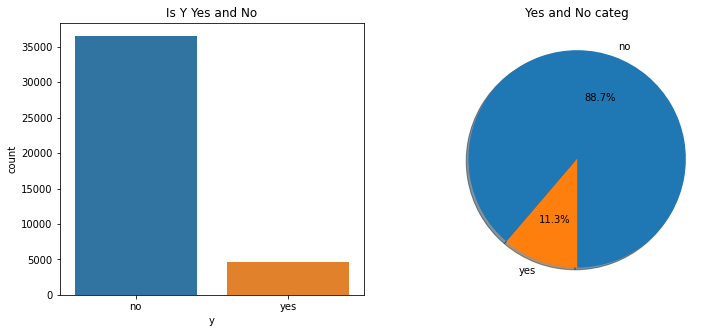

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=data)
plt.title("Is Y Yes and No")
plt.subplot(1,2,2)
labels =data['y'].value_counts(sort = True).index
sizes = data['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()

**What are the likely distributions of the independent or input numeric variables?**

**From below we can observe the likely distributions of all the numeric variables.** 

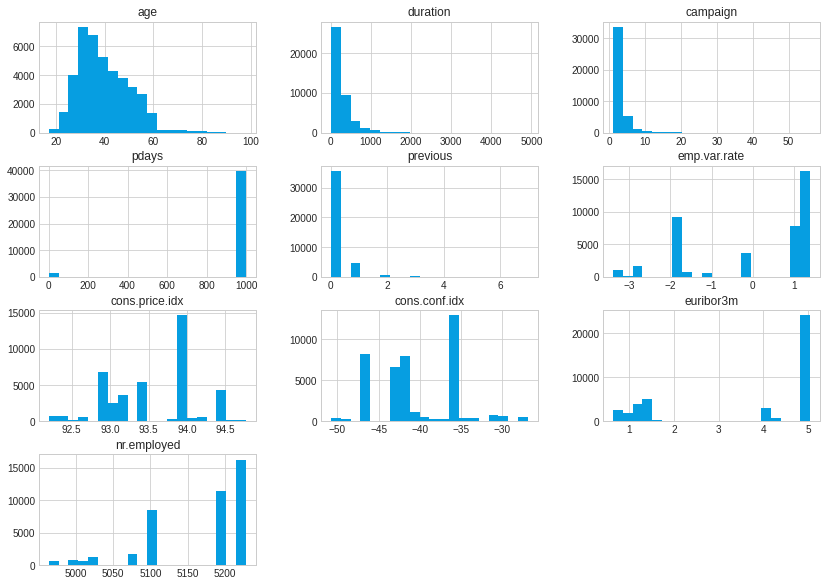

In [ ]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

<Figure size 576x360 with 0 Axes>

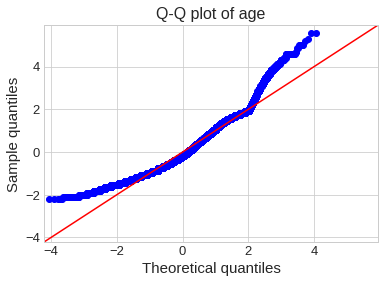

<Figure size 576x360 with 0 Axes>

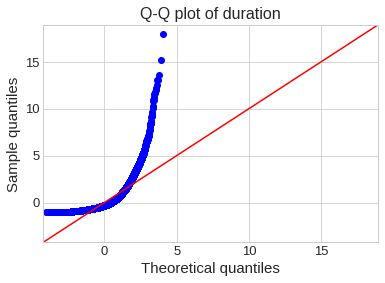

<Figure size 576x360 with 0 Axes>

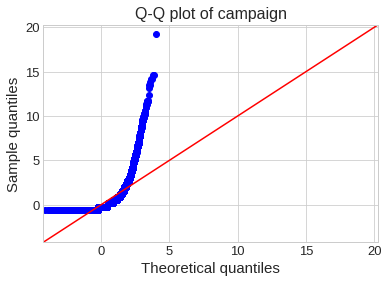

<Figure size 576x360 with 0 Axes>

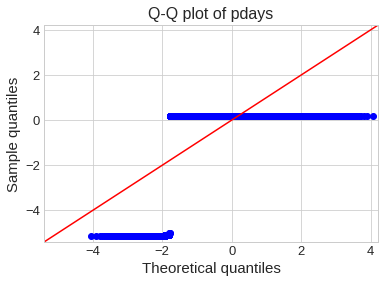

<Figure size 576x360 with 0 Axes>

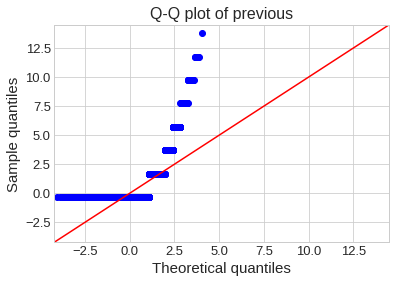

<Figure size 576x360 with 0 Axes>

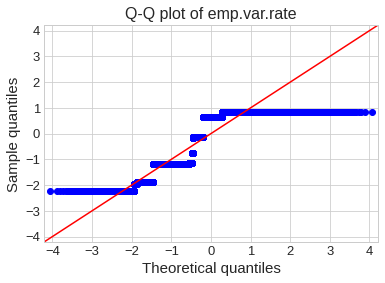

<Figure size 576x360 with 0 Axes>

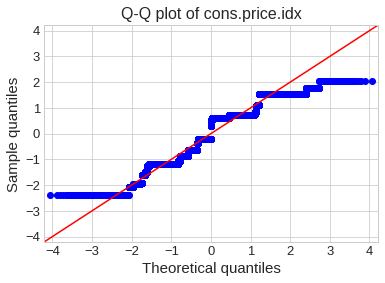

<Figure size 576x360 with 0 Axes>

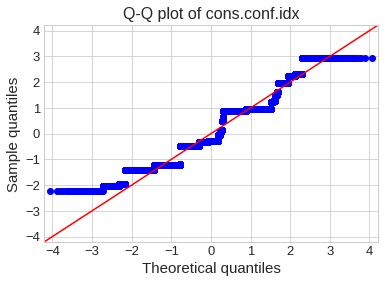

<Figure size 576x360 with 0 Axes>

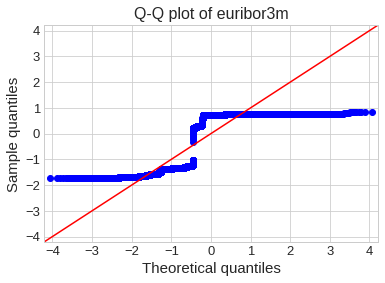

<Figure size 576x360 with 0 Axes>

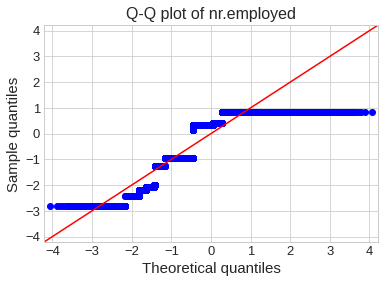

In [ ]:
#checking the distribution of independent variables
#Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',
                'cons.conf.idx','euribor3m','nr.employed']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

From above quantile plots we can suggest that while age might have a near normal distribution rest of them don't.
 

**Dummies & Normalization:**

As we can see from above that the data ranges of the columns are vastly different (ie: nr.employed mean 5167.035911 and emp.var.rate mean 0.081886). So to mprove the quality of our data we need to normalize it.

And also we have to create dummies for the categorical variables.

In [157]:

#Create Dummies
data = pd.get_dummies(data)
data2 = pd.get_dummies(data2)
# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats. (between 0-1)
#Here we are not notmalizing the categorical variables since there values are 0 or 1 already.

x = data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].values.astype(float)
x2 = data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
x2_scaled = min_max_scaler.fit_transform(x2)

# Run the normalizer on the dataframe
data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = pd.DataFrame(x_scaled)
data2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = pd.DataFrame(x2_scaled)

In [ ]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0


In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.284248,0.052518,0.028502,0.963439,0.024709,0.725393,0.535723,0.430854,0.677237,0.769134,...,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.887346,0.112654
std,0.128657,0.052720,0.050364,0.187098,0.070700,0.327283,0.225581,0.193648,0.393210,0.273163,...,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173,0.316173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020740,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.370370,0.064864,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

The three methods we will be following are 

1)Pearson Correlation

2)SelectKBest

3)permutation feature importance

**Creaing Pearson Correlation Heat Map**

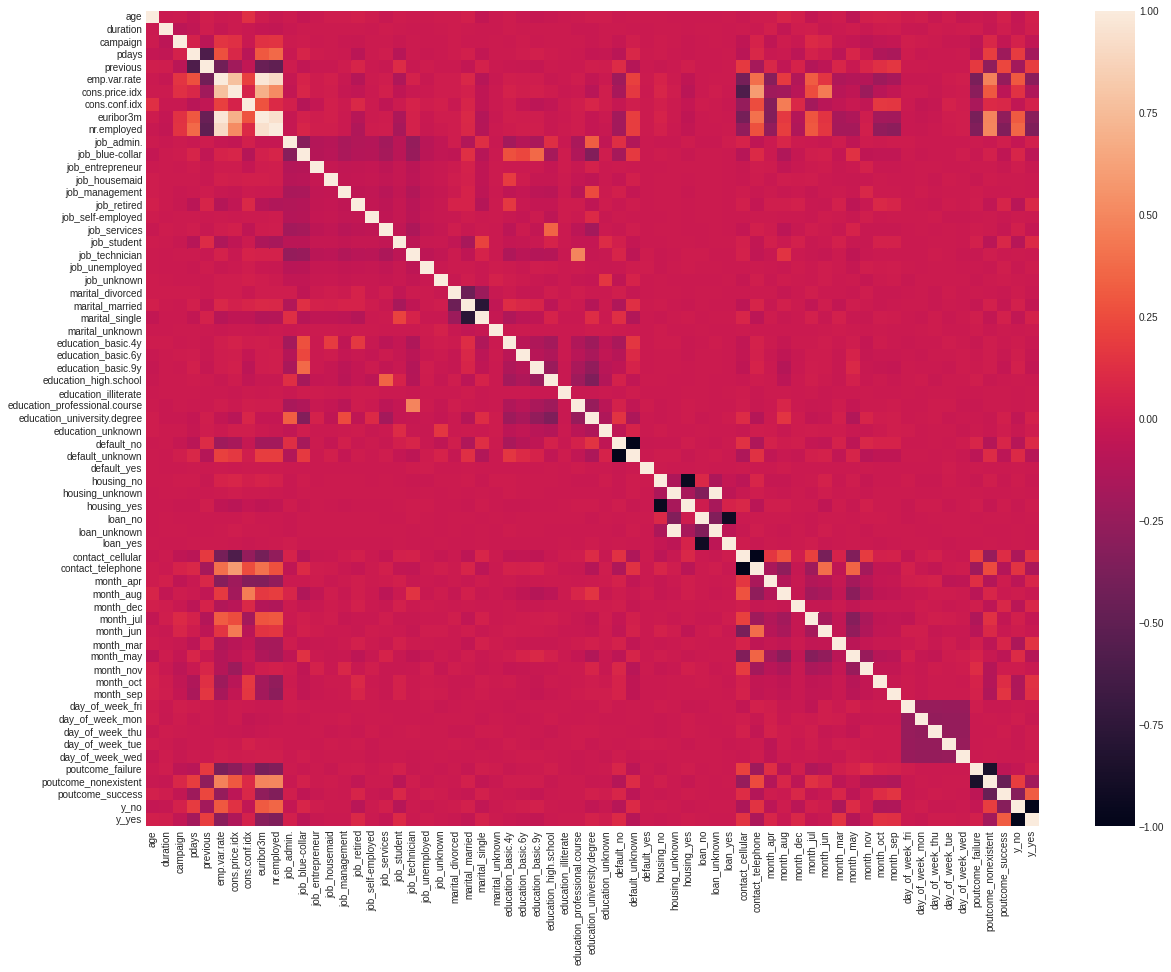

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor)
plt.show()

In [ ]:
#checking the correlation between all the features in the data
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
age,1.000000,-0.000825,0.004553,-0.034395,0.024465,-0.000263,0.001082,0.129125,0.010844,-0.017653,...,0.011458,0.024140,-0.022542,0.016504,-0.029290,-0.006275,-0.017030,0.043245,-0.035991,0.035991
duration,-0.000825,1.000000,-0.071650,-0.047575,0.020668,-0.028077,0.005163,-0.007889,-0.032960,-0.044801,...,-0.012367,-0.018605,0.011637,0.007191,0.012049,0.021103,-0.028784,0.019300,-0.026138,0.026138
campaign,0.004553,-0.071650,1.000000,0.052622,-0.079188,0.150697,0.127788,-0.013672,0.135088,0.144051,...,0.024147,0.010616,0.003743,-0.021858,-0.016602,-0.066372,0.082262,-0.044875,0.053652,-0.053652
pdays,-0.034395,-0.047575,0.052622,1.000000,-0.587581,0.271181,0.078982,-0.091437,0.297040,0.372768,...,0.013080,-0.011352,-0.000666,-0.004000,0.003334,-0.091454,0.192176,-0.212729,0.185675,-0.185675
previous,0.024465,0.020668,-0.079188,-0.587581,1.000000,-0.420562,-0.203102,-0.051075,-0.454552,-0.501407,...,0.007550,0.002190,-0.000469,-0.003217,-0.005978,0.174761,-0.274432,0.228862,-0.191912,0.191912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_failure,-0.006275,0.021103,-0.066372,-0.091454,0.174761,-0.381707,-0.297113,-0.163209,-0.385526,-0.350038,...,0.019295,-0.001179,-0.004498,-0.006026,-0.007206,1.000000,-0.853114,-0.063026,-0.031794,0.031794
poutcome_nonexistent,-0.017030,-0.028784,0.082262,0.192176,-0.274432,0.472105,0.303214,0.101017,0.488306,0.493245,...,-0.009895,0.002238,-0.000644,0.001534,0.006603,-0.853114,1.000000,-0.466920,0.193522,-0.193522
poutcome_success,0.043245,0.019300,-0.044875,-0.212729,0.228862,-0.256188,-0.076398,0.083500,-0.280723,-0.350379,...,-0.013776,-0.002281,0.008857,0.007279,-0.000416,-0.063026,-0.466920,1.000000,-0.316302,0.316302
y_no,-0.035991,-0.026138,0.053652,0.185675,-0.191912,0.297277,0.135945,-0.054225,0.307367,0.353736,...,0.006989,0.021241,-0.013797,-0.008123,-0.006290,-0.031794,0.193522,-0.316302,1.000000,-1.000000


In [ ]:
data.corr().unstack().sort_values().drop_duplicates()

contact_telephone  contact_cellular   -1.000000
y_no               y_yes              -1.000000
default_no         default_unknown    -0.999780
housing_no         housing_yes        -0.952805
loan_yes           loan_no            -0.915836
                                         ...   
emp.var.rate       cons.price.idx      0.775212
                   nr.employed         0.906908
nr.employed        euribor3m           0.945129
emp.var.rate       euribor3m           0.972242
age                age                 1.000000
Length: 2017, dtype: float64

In [ ]:
#Checking the correlation of input variables with the output variables. Using y_yes or y_no is same just opposite values. so we are using y_yes.
data.corr()["y_yes"].sort_values(ascending=False)

y_yes                   1.000000
poutcome_success        0.316302
previous                0.191912
contact_cellular        0.144774
month_mar               0.144027
                          ...   
poutcome_nonexistent   -0.193522
emp.var.rate           -0.297277
euribor3m              -0.307367
nr.employed            -0.353736
y_no                   -1.000000
Name: y_yes, Length: 65, dtype: float64

In [ ]:
def corrFilter(bound: float):
    xCorr = data.corr()#["y_yes"]
    data_corr_Filtered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    data_corr_Flattened = data_corr_Filtered.unstack().sort_values().drop_duplicates()
    return data_corr_Flattened
corrFilter(0.4)

contact_telephone              contact_cellular       -1.000000
y_yes                          y_no                   -1.000000
default_unknown                default_no             -0.999780
housing_yes                    housing_no             -0.952805
loan_yes                       loan_no                -0.915836
poutcome_nonexistent           poutcome_failure       -0.853114
marital_single                 marital_married        -0.773766
contact_cellular               cons.price.idx         -0.591415
pdays                          previous               -0.587581
nr.employed                    previous               -0.501407
poutcome_success               poutcome_nonexistent   -0.466920
euribor3m                      previous               -0.454552
marital_divorced               marital_married        -0.439698
previous                       emp.var.rate           -0.420562
month_jun                      cons.price.idx          0.444735
month_aug                      cons.conf

From above graph and corr values we can see that 
pdays 

previous,emp.var.rate,euribor3m,nr.employed,poutcome_nonexistent,poutcome_success  

above variables are highly correlated to y_yes(output), But we can also see that poutcome_nonexistent & poutcome_success have high corr between them  and also previous is also highly corr to every other variable mentioned here keeping them will effect our model, so we will only be taking poutcome_success into account.

So emp.var.rate,euribor3m,nr.employed and poutcome_success will be our predicting variables through this method.

**Feature selection through SelectKBest model.**

In [ ]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [164]:
# Create feature and target variable for Classification problem
X_clf=data.iloc[:,0:63] # features
y_clf=data.iloc[:,64] # Target variable

In [165]:
#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [166]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
#X_clf_new = SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)
# Create and fit selector
selector = SelectKBest(f_classif, k=5)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]

In [ ]:
features_df_new.head()

,emp.var.rate,euribor3m,nr.employed,poutcome_nonexistent,poutcome_success
0,0.9375,0.957379,0.859735,1,0
1,0.9375,0.957379,0.859735,1,0
2,0.9375,0.957379,0.859735,1,0
3,0.9375,0.957379,0.859735,1,0
4,0.9375,0.957379,0.859735,1,0


By using SelectKbest method we got above variables as predictable variables.
That are.

emp.var.rate

euribor3m	
  
nr.employed	

poutcome_nonexistent

poutcome_success

**Permutation feature importance method**

But it may take a lot of time with all the 65 columns present so we will be removing the columns that we know does not effect our output variable. Such as type of Job the person does, Month, education the person has, contact info, marital status etc.

In [167]:
drop_list = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
             'job_management','job_retired','job_self-employed','job_services',
             'job_student','job_technician','job_unemployed','job_unknown',
             'education_basic.4y','education_basic.6y','education_basic.9y',
            'education_high.school','education_illiterate','education_professional.course'
,'education_university.degree','education_unknown','month_apr','month_aug','month_dec','month_jul',
 'month_jun','month_mar','month_may','month_nov','month_oct','month_sep','contact_cellular'
,'contact_telephone','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','marital_divorced','marital_married','marital_single','marital_unknown','default_unknown',
'housing_unknown','loan_unknown','poutcome_nonexistent','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','poutcome_failure']
X_clf_data = X_clf[drop_list]
X_clf.drop(drop_list,axis=1,inplace=True)

In [ ]:
X_clf.head()
#below are the remaining colums

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_success
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0


Feature: 0, Score: 0.01798
Feature: 1, Score: 0.00680
Feature: 2, Score: 0.00406
Feature: 3, Score: 0.00425
Feature: 4, Score: 0.00699
Feature: 5, Score: 0.10014
Feature: 6, Score: 0.07269
Feature: 7, Score: 0.02658
Feature: 8, Score: 0.05374
Feature: 9, Score: 0.01134
Feature: 10, Score: 0.01227


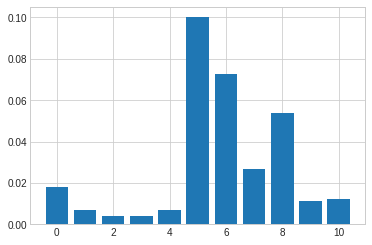

In [ ]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_clf, y_clf)
# perform permutation importance
results = permutation_importance(model, X_clf, y_clf, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importanceimportances = list(zip(xgb_classifier.feature_importances_, df.columns))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

From above graph we can observe that emp.var.rate,cons.price.idx,euribor3m,cons.conf.idx,age,poutcome_success and nr.employed are the ones effecting the output the most in that order.  

**Finally emp.var.rate,euribor3m,nr.employed and poutcome_success are the common columns presented through the 3 methods from above, SO they will be our independent variables to predict a target.**

**Which independent variables have missing data? How much?**

As we checked above multiple times there are no null or nan values in the dataset. No missing data.


**Is the predictor variables independent of all the other predictor variables?**

Yes all the predictor variables are independent of the other predictor variables. Because we can see from the above correlation matrix all the highly correlated variables are removed in the above stage it self. 

**Indentifying predictor Significance**

In [176]:
#Using OLS for p value
import statsmodels.api as sm

model = sm.OLS(data['y_yes'], data[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  y_yes   R-squared (uncentered):                -131.698
Model:                            OLS   Adj. R-squared (uncentered):           -131.714
Method:                 Least Squares   F-statistic:                             -8170.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        1.00
Time:                        21:39:29   Log-Likelihood:                         -8160.2
No. Observations:               41164   AIC:                                  1.633e+04
Df Residuals:                   41159   BIC:                                  1.637e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
emp.var.rate             0.2936      0.017     17.449      0.000       0.261       0.327
euribor3m               -0.4702      0.014    -33.375      0.000      -0.498      -0.443
nr.employed              0.0700      0.011      6.121      0.000       0.048       0.092
poutcome_nonexistent     0.1540      0.005     31.783      0.000       0.144       0.163
poutcome_success         0.5921      0.009     68.536      0.000       0.575       0.609
==============================================================================
Omnibus:                    17518.944   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67090.886
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                       7.477   Cond. No.                         23.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Which predictor variables are the most important?**

From Person Correlation nr.employed and poutcome_success are the most important variables. And emp.var.rate from selectkbest and permutation feature impotance methods. 

From above OLS method euribor3m and poutcome_success should be the most important Predictor variable.

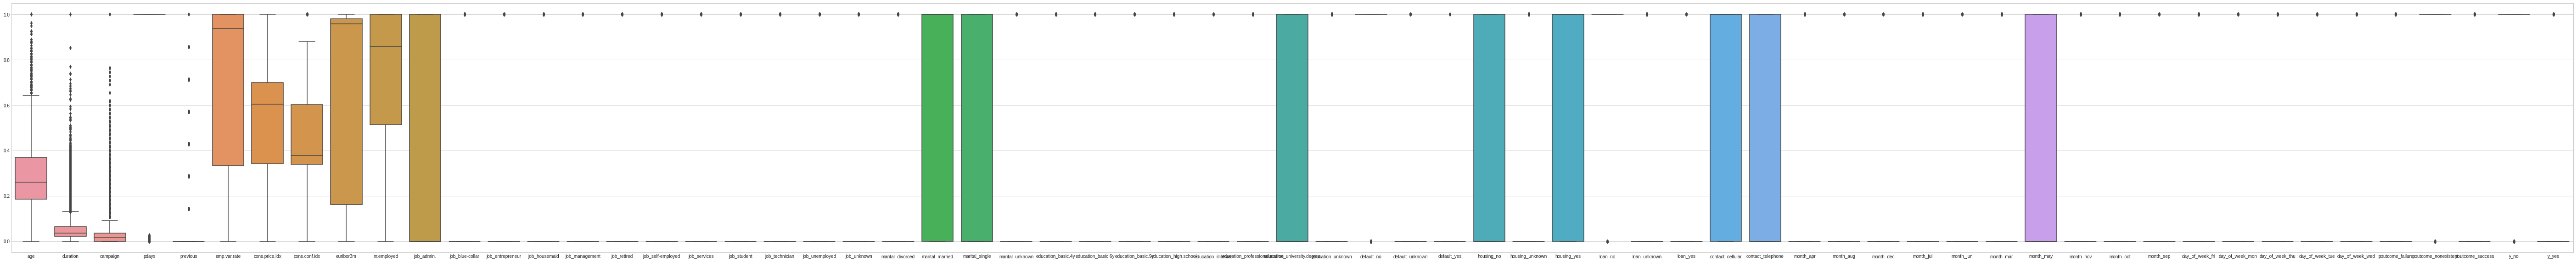

In [ ]:
#Checking the Ranges of the independent variables and dependent variable
plt.figure(figsize=(100,10))
sns.boxplot(data=data)

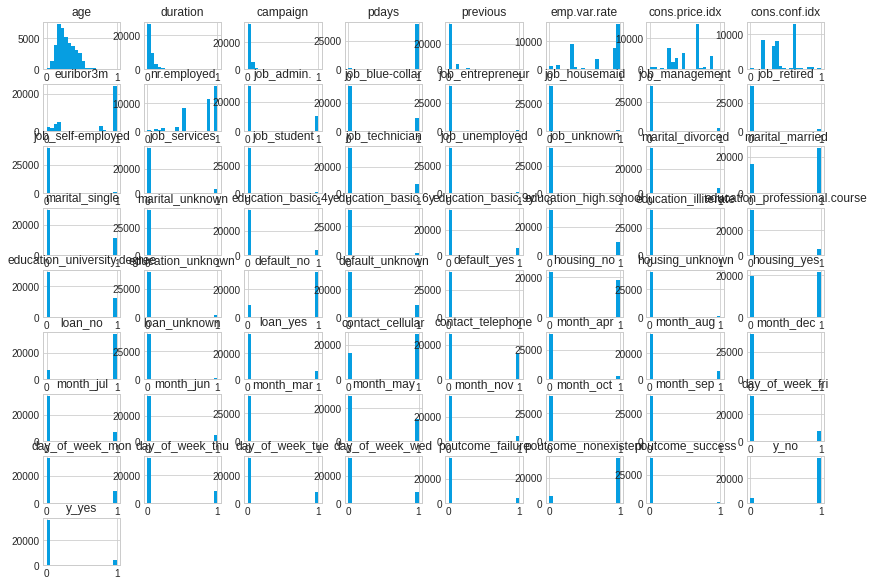

In [ ]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

**Do the ranges of the predictor variables make sense?**

Ranges of the varaibles are almost same since we normalised the data. But as we see from above there are many outliers that we may need to remove before we move ahead, so that the data may start to make much better sense.

In [168]:
#creating a drop list to drop the unnesccesary coulms from the dataset
drop_list = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
             'job_management','job_retired','job_self-employed','job_services',
             'job_student','job_technician','job_unemployed','job_unknown',
             'education_basic.4y','education_basic.6y','education_basic.9y',
            'education_high.school','education_illiterate','education_professional.course'
,'education_university.degree','education_unknown','month_apr','month_aug','month_dec','month_jul',
 'month_jun','month_mar','month_may','month_nov','month_oct','month_sep','contact_cellular'
,'contact_telephone','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','marital_divorced','marital_married','marital_single','marital_unknown','default_unknown',
'housing_unknown','loan_unknown','poutcome_nonexistent','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','poutcome_failure',
'age','duration','campaign','pdays','previous','cons.price.idx','cons.conf.idx','y_no']
data_drop = data2[drop_list]
data2.drop(drop_list,axis=1,inplace=True)

In [169]:
data2.describe()

,emp.var.rate,euribor3m,nr.employed,poutcome_success,y_yes
count,41164.000000,41164.000000,41164.000000,41176.000000,41176.000000
mean,0.725408,0.677238,0.769126,0.033345,0.112663
std,0.327251,0.393205,0.273161,0.179537,0.316184
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.160961,0.512287,0.000000,0.000000
50%,0.937500,0.957379,0.859735,0.000000,0.000000
75%,1.000000,0.980957,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


**Distributions of the predictor variables**



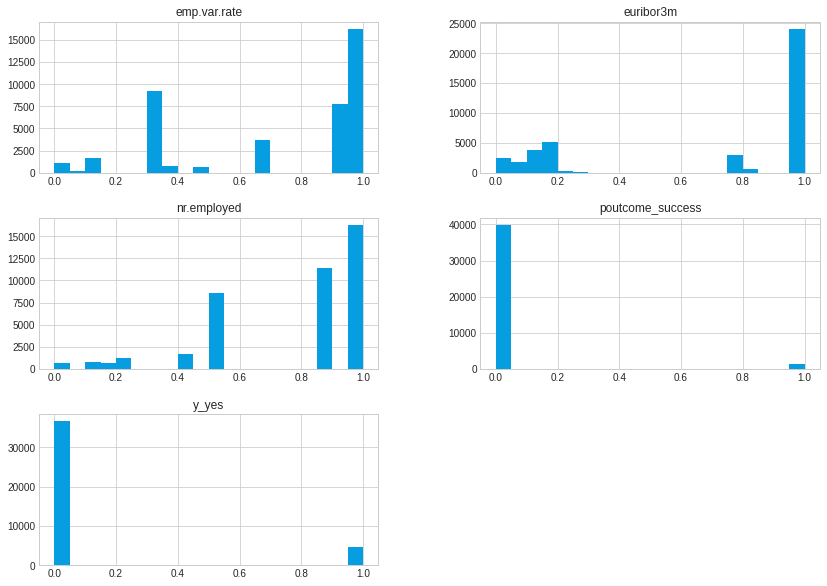

In [170]:
plt.style.use('seaborn-whitegrid')

data2.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

<Figure size 576x360 with 0 Axes>

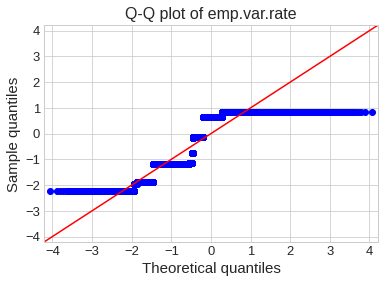

<Figure size 576x360 with 0 Axes>

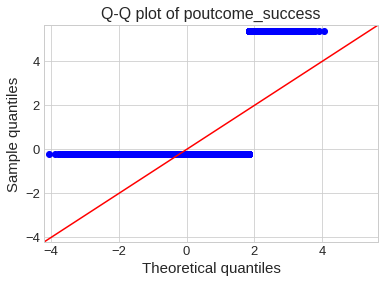

<Figure size 576x360 with 0 Axes>

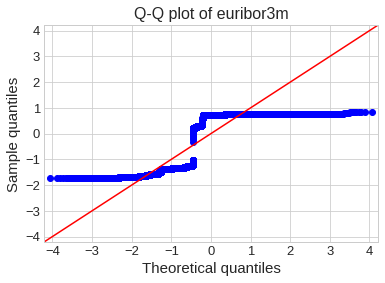

<Figure size 576x360 with 0 Axes>

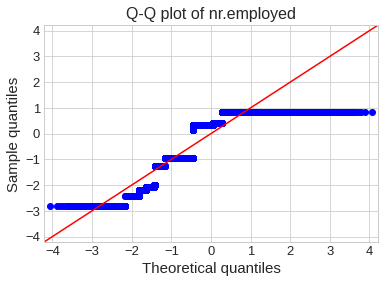

In [171]:
#checking the distribution of independent variables
#Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['emp.var.rate','poutcome_success','euribor3m','nr.employed']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**Removing Outliers**

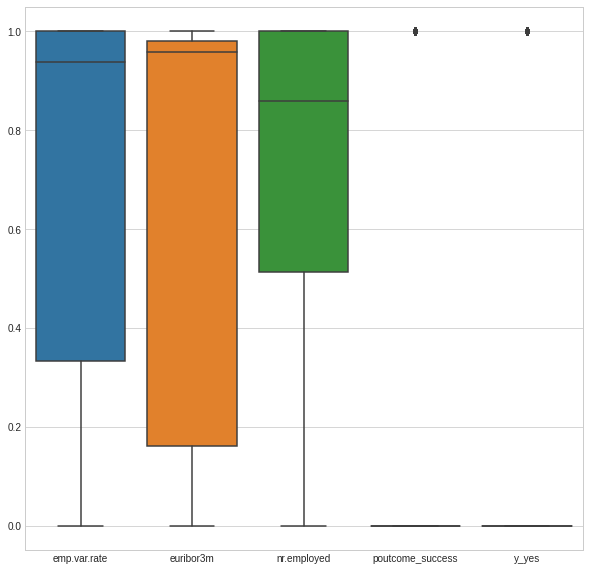

In [172]:
#Checking the Ranges of the independent variables and dependent variable
plt.figure(figsize=(10,10))
sns.boxplot(data=data2)

In [173]:
#Outliers Removal
Q1 = data2.quantile(0.05)
Q3 = data2.quantile(0.95)
#IQR = Q3 - Q1 I tried IQR method but it's returing me with nan, so I opted manually 
#to remove outliers less than 5 persentile and more than 95 percentile.

#data2 = data2[~((data2 < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data2 = data2[~((data2 < (Q1)) |(data2 > (Q3))).any(axis=1)]

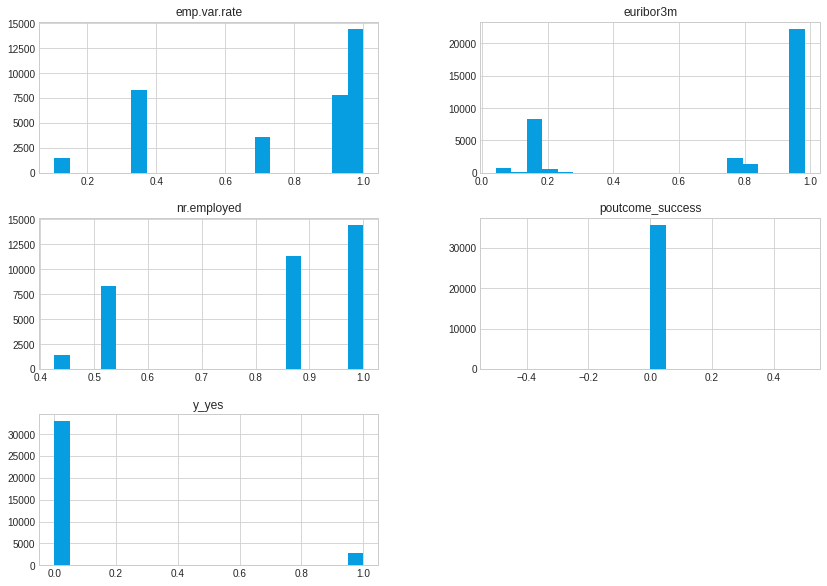

In [174]:
plt.style.use('seaborn-whitegrid')

data2.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

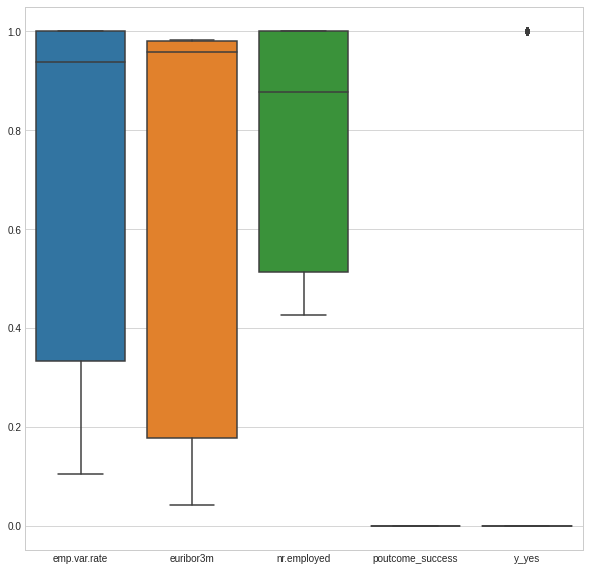

In [175]:
#Checking the Ranges of the independent variables and dependent variable
plt.figure(figsize=(10,10))
sns.boxplot(data=data2)

So we have created two pds from dataset tey are data and data2, I have removed the outliers for data2 while I didn't for data. 

Since we have Classification type of OUTCOME(y) we should adapt Logistic regression. 

We will Run the Logistic regression both times for data and data2 both.

In [177]:
#import the pkgs required
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
#input variables
X1 = data[['emp.var.rate','poutcome_success','euribor3m','nr.employed']]
#output variable
y1 = data[['y_yes']]
#splitting data in to train and test, 20% of data will be used for testing
#stratify for sorting 
#fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
logisticRegr.fit(X1_train_data, y1_train_data)
#The output of a Logistic regression model is a probability. We can select a threshold value. 
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 0.5
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X1_test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [178]:
Z = logisticRegr.predict(X1_test_data)

In [179]:
rms = mean_squared_error(y1_test_data, Z , squared=False);
rms

0.31884798098964545

In [180]:
logisticRegr.score(X1_test_data, y1_test_data)

0.8983359650188266

**So for data(with outliers) the accuracy is 89%**

In [182]:
#Since we are getting an error below suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
data2.replace([np.inf, -np.inf], np.nan)

data2.dropna(inplace=True)

In [183]:
#import the pkgs required
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
#input variables
X2 = data2[['emp.var.rate','poutcome_success','euribor3m','nr.employed']]
#output variable
y2 = data2[['y_yes']]
#splitting data in to train and test, 20% of data will be used for testing
#stratify for sorting 
#fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
logisticRegr.fit(X2_train_data, y2_train_data)
#The output of a Logistic regression model is a probability. We can select a threshold value. 
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 0.5
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X2_test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [184]:
Z2 = logisticRegr.predict(X2_test_data)

In [186]:
rms = mean_squared_error(y2_test_data, Z2 , squared=False);
rms

0.27574724389522315

In [187]:
logisticRegr.score(X2_test_data, y2_test_data)

0.9239634574841883

**So for data2(with out outliers) the accuracy is 92.3%**

As expected the data with out outliers is better for prediction model than the data with outliers.

**For categorical data, calculate the accuracy and a confusion matrix.**

 From above we already got the accuracy be 89%(with outliers) and 92% without them.

Now

Confusion Matrix:

A confusion matrix is a technique for summarizing the performance of a classification algorithm.

In [189]:
#Confusion matric for data with out outliers
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report
print(classification_report(y2_test_data,Z2))
print(confusion_matrix(y2_test_data,Z2))



              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6574
           1       0.00      0.00      0.00       541

    accuracy                           0.92      7115
   macro avg       0.46      0.50      0.48      7115
weighted avg       0.85      0.92      0.89      7115

[[6574    0]
 [ 541    0]]


In [190]:
#Confusion matric for data with outliers
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report
print(classification_report(y1_test_data,Z))
print(confusion_matrix(y1_test_data,Z))



              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7306
           1       0.70      0.17      0.28       927

    accuracy                           0.90      8233
   macro avg       0.80      0.58      0.61      8233
weighted avg       0.88      0.90      0.87      8233

[[7236   70]
 [ 767  160]]


**Do the training and test sets have the same data?**

No, since we divided them as shown above they might have data from same dataset. but not the same data.

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods.

In [220]:
data22 = data2.copy()


In [216]:
# Selecting 10% of data from dataset
data22_10 = data22.sample(frac=0.1)
# Replacing values by NaN

#for col in data22.columns:
#can't impute all the variables with mean or median since 2 of the variables are Categorical in nature and
#since all values are 0 or 1 and mean or median would be 0.3 or somthing so the values would be incorrect in nature.
data22['emp.var.rate'].loc[data22.index.isin(data22_10.index)]=np.NaN

In [217]:
#Count of null values
data22.isnull().sum()

emp.var.rate        3558
euribor3m              0
nr.employed            0
poutcome_success       0
y_yes                  0
dtype: int64

In [218]:
for col in data22.columns:
    data22[col] = data22[col].fillna(data22[col]).mean()

In [219]:
#Count of null values  
data22.isnull().sum()

emp.var.rate        0
euribor3m           0
nr.employed         0
poutcome_success    0
y_yes               0
dtype: int64

In [221]:
# Selecting 5% of data from dataset
data22_5 = data22.sample(frac=0.05)
# Replacing values by NaN

#for col in data22.columns:
data22['emp.var.rate'].loc[data22.index.isin(data22_5.index)]=np.NaN

In [222]:
#Count of null values
data22.isnull().sum()

emp.var.rate        1779
euribor3m              0
nr.employed            0
poutcome_success       0
y_yes                  0
dtype: int64

In [223]:
for col in data22.columns:
    data22[col] = data22[col].fillna(data22[col]).median()

In [224]:
#Count of null values  
data22.isnull().sum()

emp.var.rate        0
euribor3m           0
nr.employed         0
poutcome_success    0
y_yes               0
dtype: int64

In [225]:
# Selecting 1% of data from dataset
data22_1 = data22.sample(frac=0.01)
# Replacing values by NaN

#for col in data22.columns:
data22['emp.var.rate'].loc[data22.index.isin(data22_1.index)]=np.NaN

In [226]:
#Count of null values
data22.isnull().sum()

emp.var.rate        356
euribor3m             0
nr.employed           0
poutcome_success      0
y_yes                 0
dtype: int64

In [242]:
for col in data22.columns:
    data22[col] = data22[col].fillna(data22[col]).median()

In [243]:
#Count of null values  
data22.isnull().sum()

emp.var.rate        0
euribor3m           0
nr.employed         0
poutcome_success    0
y_yes               0
dtype: int64

**References:**

https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

https://www.digitalocean.com/community/tutorials/normalize-data-in-python

https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/

https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html

https://www.statology.org/confusion-matrix-python/#:~:text=Logistic%20regression%20is%20a%20type,values%20from%20the%20test%20dataset.


